# Project 2: Take Home test (Konigle - NLP Project)

Hi there! We are very very happy to have you interview with us! <br>

The idea behind this challenge, is to see how you think, prioritize tasks and work with real problem.
There is **no right or wrong answer**; we just want to get a feel of what you can do.
Don't be afraid to ask questions!

**Questions are there to guide you; but feel free to play with the dataset and go further than what is written in the guidelines!**





# Project Description

<br>

**Project Objective:** The objective is to perform binary classification on the tweets from airline passengers in US for six different airlines. The classes are
1. **Negative**
2. **Non-Negative**

Originaly, the dataset contains three different classes, **you may have to merge the positive and negative class in a single class**.

**Dataset**: [Kaggle: Twitter US Airline Sentiment](https://www.kaggle.com/crowdflower/twitter-airline-sentiment)
The download link has been provided below.

This data set contains roughly 15K tweets with 3 possible classes for the sentiment (positive, negative and neutral). The data has been already cleaned from the original format, but you can further clean the data if it can increases the accuracy of the model. 

Here, you are advised to start with basic model and then use any pre-trained word embedding method such as word2vec, GloVe, FastText to compare the results.



In [212]:
# You can download the dataset using (please uncomment to download)
!wget "https://www.dropbox.com/s/ky0e7xcdv2erree/Tweets.csv"
!ls -la

--2019-10-09 14:37:13--  https://www.dropbox.com/s/ky0e7xcdv2erree/Tweets.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ky0e7xcdv2erree/Tweets.csv [following]
--2019-10-09 14:37:14--  https://www.dropbox.com/s/raw/ky0e7xcdv2erree/Tweets.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce52c23635acd4db39ace16432b.dl.dropboxusercontent.com/cd/0/inline/AqGCfCu-UeloZfYdIPTg-qoyJ4WWvCG1IEKsB2a8orH_9wzL0o9Tv1TkckICCvXnlDcyQnjZeqhtmec_bsj2ouT8Rdwi_3LYVEKL0BtBaZP3qH8zolwtcK_e0xeqW9O3OEw/file# [following]
--2019-10-09 14:37:14--  https://uce52c23635acd4db39ace16432b.dl.dropboxusercontent.com/cd/0/inline/AqGCfCu-UeloZfYdIPTg-qoyJ4WWvCG1IEKsB2a8orH_9wzL0o9Tv1TkckICCvXnlDcyQnjZeqhtmec_bsj2ouT8Rdwi_3LYVEKL0BtBaZP3qH8zolwtcK_e

In [0]:
import pandas as pd
df = pd.read_csv("Tweets.csv")
#df.head(30)


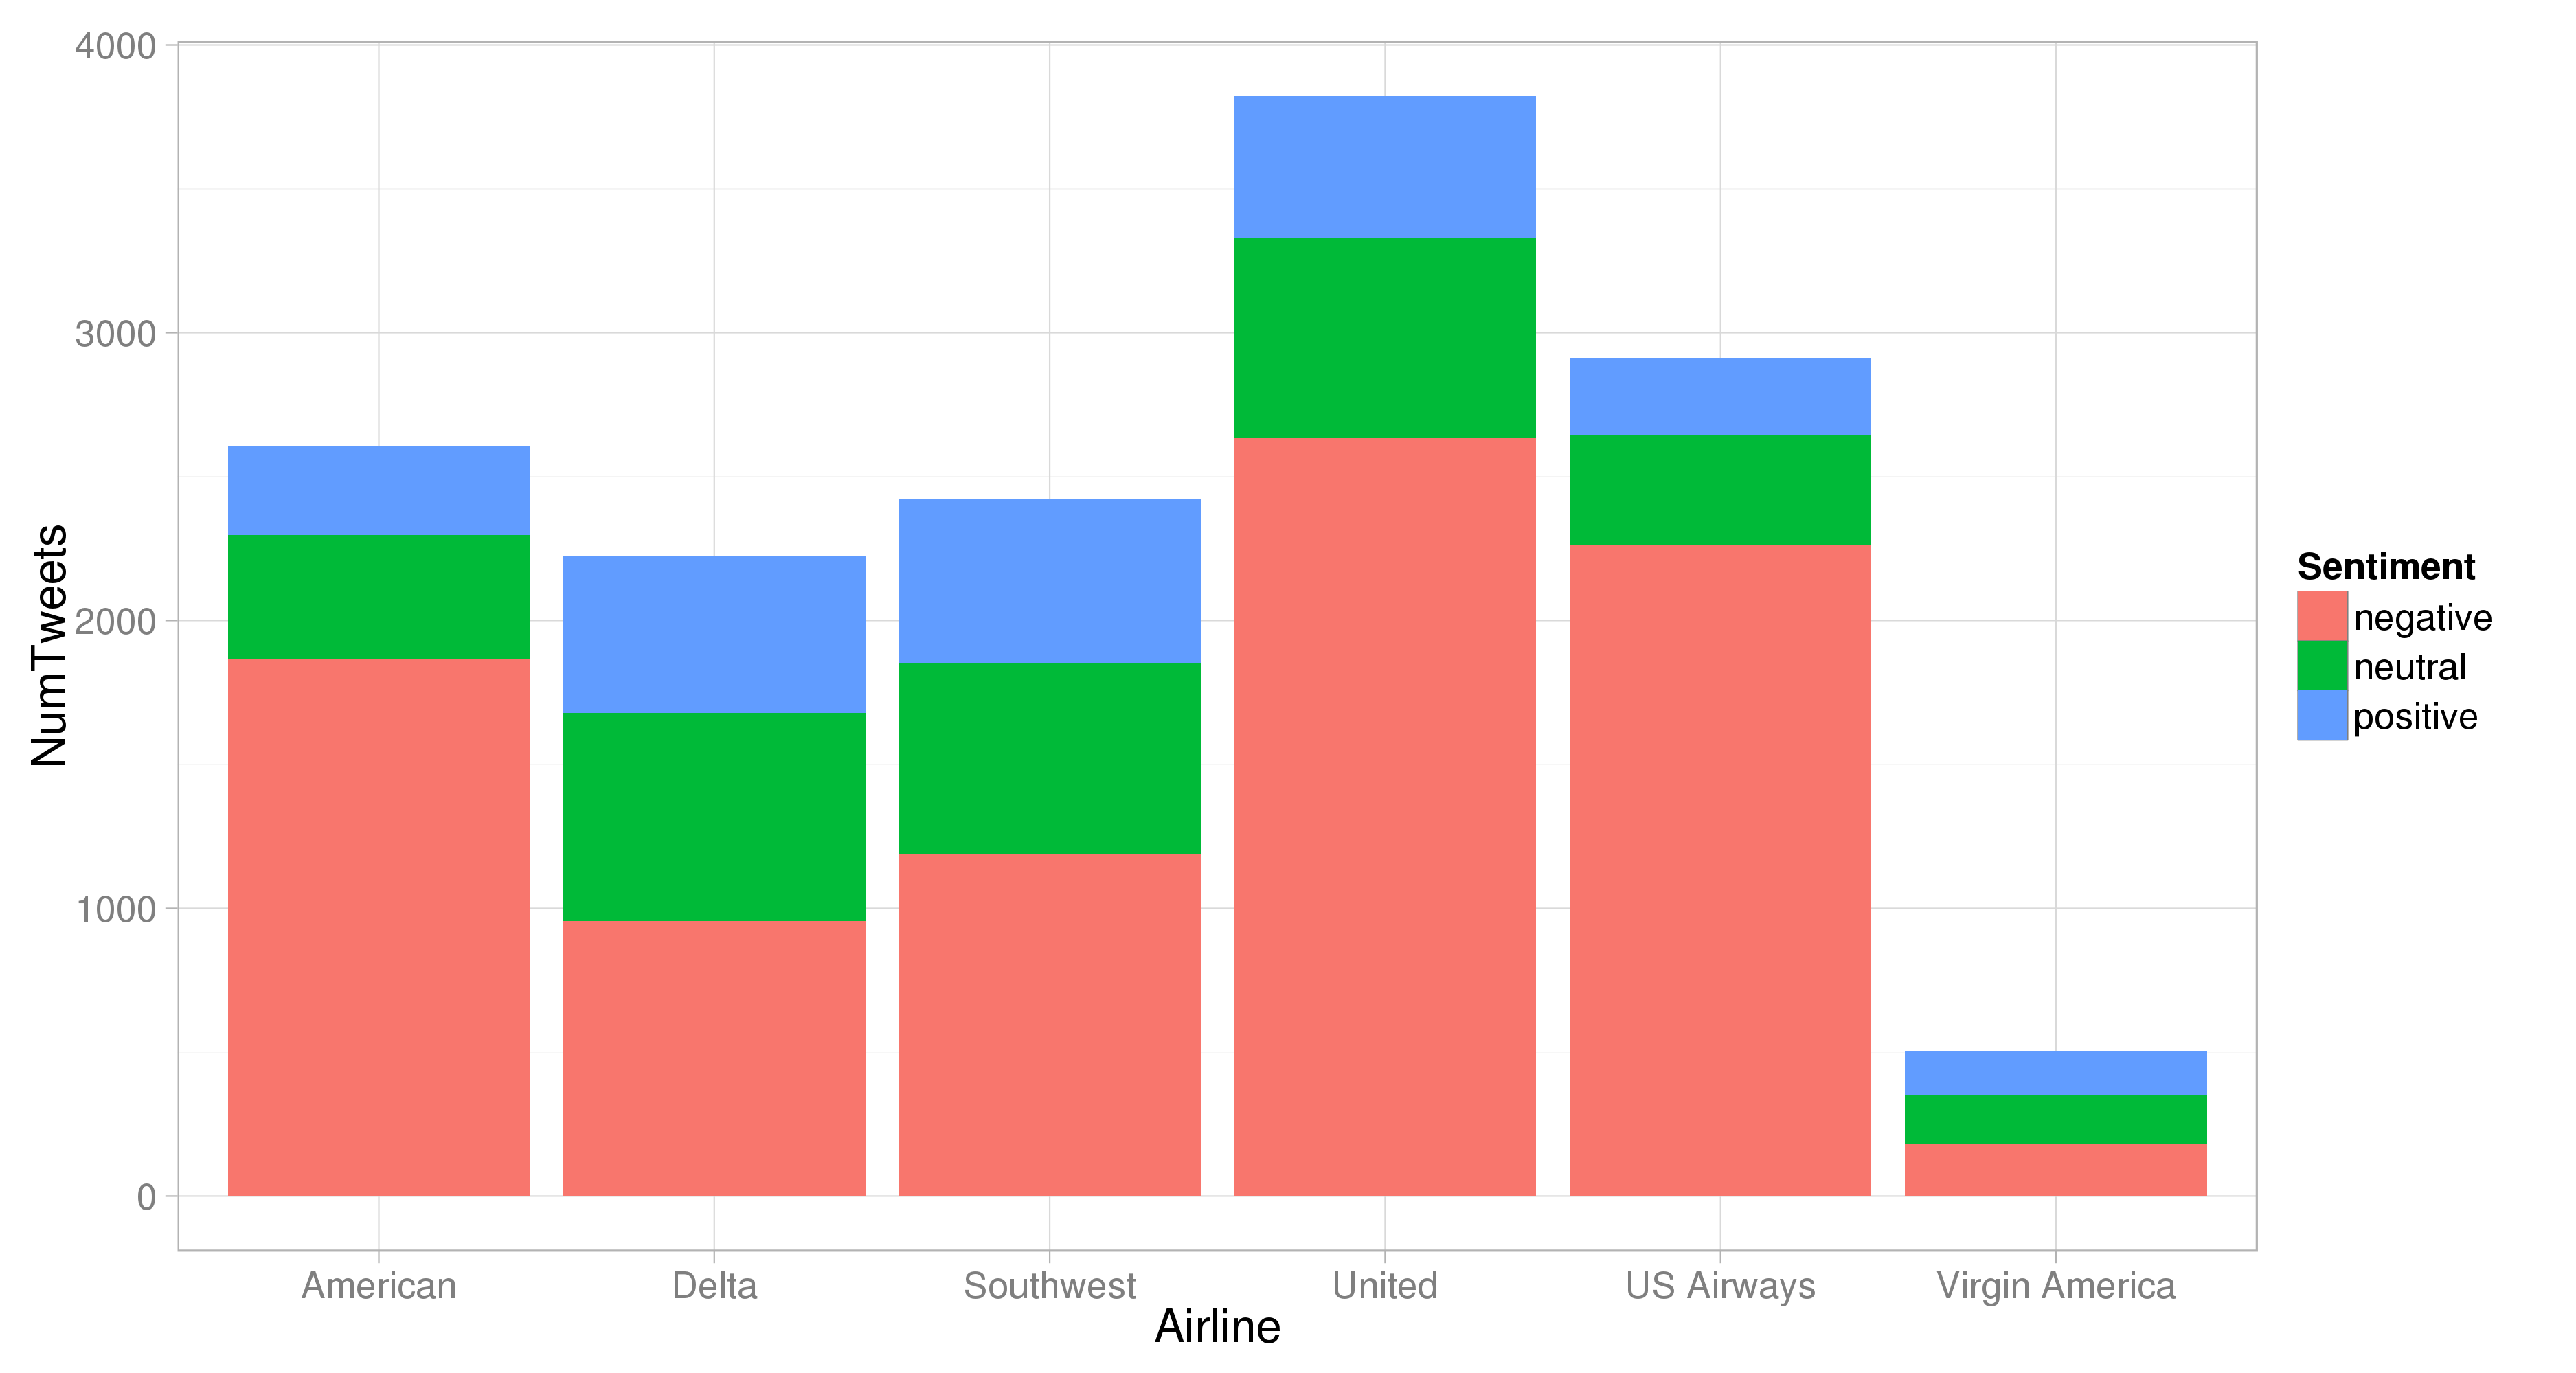

# Project Preperation

## Setup projet

In [216]:
#Import Statements
!pip3 install emoji
!pip3 install preprocessor
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
%matplotlib inline
import seaborn as sn


import spacy
from wordcloud import WordCloud
from emoji import UNICODE_EMOJI

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk import ngrams



from sklearn.metrics import mean_squared_error,accuracy_score,classification_report,roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

from sklearn.linear_model import LogisticRegression

from gensim.models import KeyedVectors
from gensim.models import Word2Vec



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Data Explorations
NOTE: The order of the topics has been switched by me because I feel that data exploration has to be done before cleaning and augmenting the data. The programmer needs to have an idea of data characteristics like class imbalance, major negative reason booster according to different airlines etc. As a result, I will use matplotlib/seaborn to generate graphs and explore the data. 

In [217]:
'''
#Basic understanding about the data and features:

#tweet_id - USELESS AND CAN BE REMOVED
#airline_sentiment - LABELS for the data, will be used to train and test the model
#airline_sentiment_confidence - WEIGHTS for the accuracy of the labels. Reliability of the labels. 
#negative_reason - Will only be present for the negative reviews, otherwise NaN.
#negative_reason_confidence - WEIGHTS for the negative raeasoning or reliability. 
#airlines - the carrier
#airline_sentiment_gold - UNSURE about this feature but will check for the different values while data exploration
#name - USELESS AND CAN BE REMOVED
#negative_reason_gold - UNSURE about this feature but will check for the different values while data exploration
#retweet_count - Useful because demonstrates how many people have been through a similar experience
#text - the tweet itself, very important. Most of the processing will be done on this. 
#tweet_cord - USELESS AND CAN BE REMOVED
#tweet_created - USELESS AND CAN BE REMOVED
#tweet_location - USELESS AND CAN BE REMOVED
#user_timezone - USELESS AND CAN BE REMOVED AS WELL

'''

'\n#Basic understanding about the data and features:\n\n#tweet_id - USELESS AND CAN BE REMOVED\n#airline_sentiment - LABELS for the data, will be used to train and test the model\n#airline_sentiment_confidence - WEIGHTS for the accuracy of the labels. Reliability of the labels. \n#negative_reason - Will only be present for the negative reviews, otherwise NaN.\n#negative_reason_confidence - WEIGHTS for the negative raeasoning or reliability. \n#airlines - the carrier\n#airline_sentiment_gold - UNSURE about this feature but will check for the different values while data exploration\n#name - USELESS AND CAN BE REMOVED\n#negative_reason_gold - UNSURE about this feature but will check for the different values while data exploration\n#retweet_count - Useful because demonstrates how many people have been through a similar experience\n#text - the tweet itself, very important. Most of the processing will be done on this. \n#tweet_cord - USELESS AND CAN BE REMOVED\n#tweet_created - USELESS AND C

In [218]:
'''Basic Data Exploration using Pandas and dropping the not required columns identified in the above cell.'''
#df.shape
#df.dtypes
#df.describe()
df = df.drop(["tweet_id","name","tweet_coord","tweet_created","tweet_location","user_timezone"], axis=1)
df.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,negativereason_gold,retweet_count,text
0,neutral,1.0000,NaN,NaN,Virgin America,NaN,NaN,0,@VirginAmerica What @dhepburn said.
1,positive,0.3486,NaN,0.0000,Virgin America,NaN,NaN,0,@VirginAmerica plus you've added commercials t...
2,neutral,0.6837,NaN,NaN,Virgin America,NaN,NaN,0,@VirginAmerica I didn't today... Must mean I n...
3,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,NaN,0,@VirginAmerica it's really aggressive to blast...
4,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,NaN,0,@VirginAmerica and it's a really big bad thing...


"\nCLASS IMBALANCE COMMENTS -- After replacing the positive values with neutral, the class imbalance has been reduced. Therefore, using data augmentation for generating SYNTHETIC REVIEWS and addressing class imbalance shouldn't be a \npriority for now. However it can be done at the end while trying to improve the model accuracy\n"

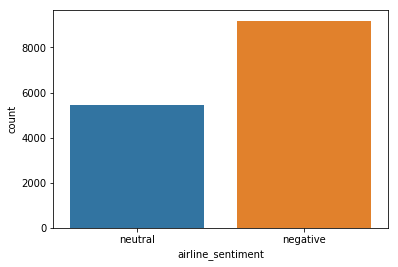

In [219]:
'''
Merging the POSITIVE AND NEUTRAL airline sentiments and checking for class imbalance
'''
df.replace(to_replace ="positive", value ="neutral", inplace=True) 
#df.shape
#df.head()
ax3 = sn.countplot(x="airline_sentiment",data=df)

'''
CLASS IMBALANCE COMMENTS -- After replacing the positive values with neutral, the class imbalance has been reduced. Therefore, using data augmentation for generating SYNTHETIC REVIEWS and addressing class imbalance shouldn't be a 
priority for now. However it can be done at the end while trying to improve the model accuracy
'''

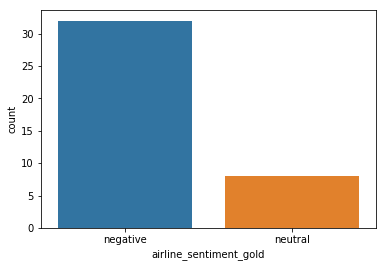

In [220]:
'''Checking for different possible values of UNSURE feature so can decide whether to have them in the dataset or not.'''
#First Unsure Feature - Airline Sentiment Gold
ax1 = sn.countplot(x="airline_sentiment_gold",data=df)

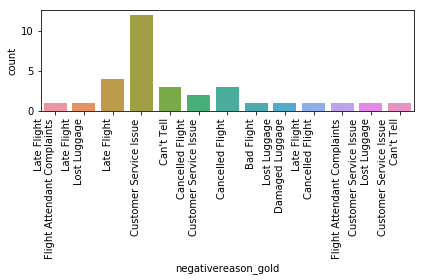

In [221]:
#Second Unsure Feature - Negative Reason Gold
ax2 = sn.countplot(x="negativereason_gold",data=df)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

'\nCONCLUSION: For most of the tweets, RETWEET COUNT == 0, but there are some cases of 1 and 2 retweets at max, so we will allow the FEATURE to be in our dataset.\n'

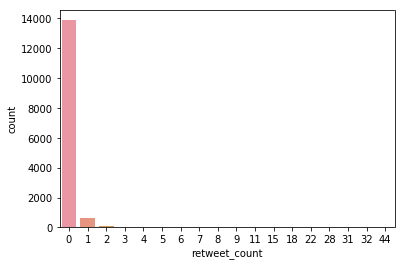

In [222]:
'''
Plotting Countplots for different features to check all the kind of values present
'''
#retweet count
ax = sn.countplot(x="retweet_count",data=df)

'''
CONCLUSION: For most of the tweets, RETWEET COUNT == 0, but there are some cases of 1 and 2 retweets at max, so we will allow the FEATURE to be in our dataset.
'''

In [223]:
'''
SPECIFIC AIRLINES BASED DATA EXPLORATION:

A specific airline based analysis and graphing can be done using the graphs but I will skip that part for now because main goal of the project is to DISTINGUISH betweent the NEUTRAL and NEGATIVE values based on the tweet text and we are not 
required to classify the reasons for negative tweets according to airlines. It would be a great point of extension for this project, but I will skip it for now because of time and scope constraint and maybe come back to it later. 
'''
#print(UNICODE_EMOJI)

'\nSPECIFIC AIRLINES BASED DATA EXPLORATION:\n\nA specific airline based analysis and graphing can be done using the graphs but I will skip that part for now because main goal of the project is to DISTINGUISH betweent the NEUTRAL and NEGATIVE values based on the tweet text and we are not \nrequired to classify the reasons for negative tweets according to airlines. It would be a great point of extension for this project, but I will skip it for now because of time and scope constraint and maybe come back to it later. \n'

really aggressive blast obnoxious faces little recourse really big bad thing seriously would pay flight seats really bad thing flying VA schedule still I flew NYC SFO last week fully sit seat due two large gentleman either side first fares May three times carriers seats available guys messed I reserved seating friends guys gave seat away I want free internet status match I applied three Called emailed What happened 2 ur vegan food At least say ur site know I able 2 eat anything next 6 hrs amazing get cold air I bked cool birthday trip add elevate cause entered middle name Flight Booking Problems left expensive headphones flight 89 IAD LAX Seat No one answering number awaiting return phone would prefer use online option Your chat support working first time flyer next week But hard time getting flights added Elevate excited trying 2 book since last week page never I called weeks ago adding 3 flights 2014 still shown heyyyy trying get someone call hold minutes earlier flights LA NYC earli

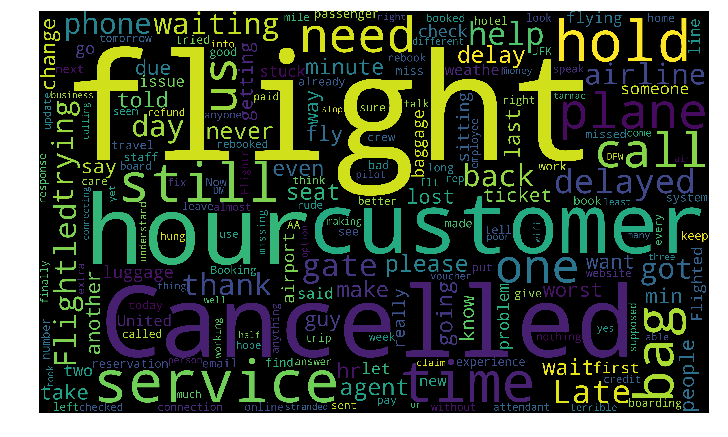

In [224]:
'''
WORD CLOUD:

As we skipped the specific airlines based analysis in the previous step, we will further move on to build a WORD CLOUD to find the MOST COMMON words found in the NEGATIVELY LABELLED TWEETS.

It will be executed in following manner:
a) The text data of the tweets will be extracted from the dataframe and bit of processing will be done using basic parsing techniques
b) The processed data will be further used to generate a wordcloud which will give us a clearer image of what kind of words are present in the NEGATIVELY LABELLED TWEETS.
'''
req_data = df[df['airline_sentiment']=='negative']
input_text = ' '.join(req_data['text'])
stop_words_list = set(stopwords.words("english"))
#print(input_text)

final_text = ''
text_list = input_text.split(' ')

#for items in text_list:
  #if ('@' not in items) and ('http' not in items) and ('https' not in items) and ('#' not in items) and (items not in UNICODE_EMOJI):
    #final_text+=items+" "


for items in text_list:
  if items.isalnum():
    if items not in stop_words_list:
      final_text+=items + " "
    
#Removing Emoticons    
#final_text = final_text.encode('ascii', 'ignore').decode('ascii')
print(final_text)

processed_text = WordCloud(collocations = False).process_text(text = final_text)
wordcloud = WordCloud(width = 5000, height = 3000).fit_words(processed_text)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()




## Data Processing and Augmentation

In [0]:
'''
AUGMENTATION: There is no need to do data augmentation for now because the class imbalance has reduced by merging positive and neutral tweets. However, we can try to address this towards the end while trying to improve accuracy.
PROCESSING: 
a) Basic processing has already been done by replacing the POSITIVE vals with NEUTRAL vals in-place in pandas dataframe
b) Cleaning of the raw tweet data needs to be done before we vectorize it and feed it into our final model. 
c) tweet_cleaner() takes raw tweet as an input and returns the list of filtered and normalized words from the tweet. Please refer to the commented testing example to check the results. 
d) ngrams() tries to identify phrases with length 2 (bigrams) that are commonly used together in the tweets so that the word "new" in some tweet, is not interpreted same as new in "New York". The goal is to identify words 
commonly used together. 
'''

def ret_words(inputTweet):
  inputTweet = inputTweet.lower()
  stop_words_list = set(stopwords.words("english"))
  #lemma = WordNetLemmatizer()
  
  raw_text_list = inputTweet.split()
  op_list = []
  lemma = WordNetLemmatizer()
  
  for w in raw_text_list:
    if w.isalpha():
      if w not in stop_words_list:
        op_list.append(w)
        
  lem = lemma.lemmatize(' '.join(op_list))
  
  return list(op_list)

def ngrams(input_list):
  #one_grams are contained in list itself.
  onegrams = input_list
  bigrams = [' '.join(t) for t in list(zip(input_list, input_list[1:]))]
  
  return onegrams+bigrams

#req_text = "@American, ::Lol :)Bad Worse Experience, I love New York"
#print(ngrams(ret_words(req_text)))


def tweet_cleaner(inputTweet):
  inputTweet = inputTweet.lower()
  stop_words_list = set(stopwords.words("english"))
  #lemma = WordNetLemmatizer()
  
  
  raw_text_list = inputTweet.split()
  op_list = []
  
  for w in raw_text_list:
    if w.isalpha():
      if w not in stop_words_list:
        op_list.append(w)
        
  
  #final_out = lemma.lemmatize(' '.join(op_list))
  final_out = ' '.join(op_list)
  
  return final_out


#DRIVER CODE TESTING
#req_data = df[df['airline_sentiment']=='negative']
#req_text = ' '.join(req_data['text'])
#req_text = "@American, ::Lol :)Bad Worse Experience, I love New York"

#print(ngrams(ret_words(req_text)))

In [0]:
'''
The cleaning function defined above will be applied on the individual tweets in Pandas dataframe and finally the CLEANED raw tweets will be added to TRAINING set and the airline_sentiments will be used for TESTING. 
'''
#Converting NEGATIVE and NEUTRAL to zeros and ones --- Negative == 1 and Neutral == 0
req_data = df['airline_sentiment']
req_data = req_data.to_numpy()
Y_data = []

for items in req_data:
  if items == "neutral":
    Y_data.append(0)
    
  elif items == "negative":
    Y_data.append(1)
        
#Y_data = np.asarray(Y_data)
#print(Y_data)
#Y_data.shape

req_data = df['text']
req_data = req_data.to_numpy()
X_data = []

for items in req_data:
  #print(">>>",tweet_cleaner(items))
  X_data.append(tweet_cleaner(items))
  #X_data = list(set(X_data+tweet_cleaner(items)))

#X_data = np.asarray(X_data)

#print(X_data)
#X_data.shape

#Train Test Split (80:20)
X_train = X_data[:11800]
#X_train = np.asarray(X_train)
Y_train = Y_data[:11800]
Y_train = np.asarray(Y_train)

X_test = X_data[11800:]
#X_test = np.asarray(X_test)
Y_test = Y_data[11800:]
Y_test = np.asarray(Y_test)


'''
EMBEDDING STAGE (Training it on our custom data)
'''
v = TfidfVectorizer(analyzer = "word")
X = v.fit_transform(X_train)
X_train = X.toarray()

X = v.transform(X_test)
X_test = X.toarray()

#X = v.transform(X_test)
#print(v.get_feature_names())
#print(X.toarray())
#X_test = X.toarray()

In [228]:
'''
As I had no prior experience working with NLP projects, this step of creating word embeddings was probably the most challenging step for me because online resources provided a lot of options like
Deep Learning using RNN to find the closely related words and etc. But as I had no experience with it in the past, I decided to start with the most simple mapping strategies that are available in 
sklearn itself. Maybe I can expand the future scope of this project to implement a RNN based word embedding but I would only do it after understanding the theory that runs below it and not 
blindly by copying the code-along tutorials available on the internet.

Instead of using sklearn tfid, gensim cbow or sgram model could have also been used. But I realized this after I started working with pre-trained model. 
'''

'\nAs I had no prior experience working with NLP projects, this step of creating word embeddings was probably the most challenging step for me because online resources provided a lot of options like\nDeep Learning using RNN to find the closely related words and etc. But as I had no experience with it in the past, I decided to start with the most simple mapping strategies that are available in \nsklearn itself. Maybe I can expand the future scope of this project to implement a RNN based word embedding but I would only do it after understanding the theory that runs below it and not \nblindly by copying the code-along tutorials available on the internet.\n\nInstead of using sklearn tfid, gensim cbow or sgram model could have also been used. But I realized this after I started working with pre-trained model. \n'

# Modelling

## Build the base model

***Logistic Regression***

In [229]:
#try traditional machine learning models and based on the accuracy and time permit, try to proceed towards more complex models like neural network
logistic_regression = LogisticRegression(solver='lbfgs', penalty='l2', fit_intercept=False, C = 0.1)

logistic_regression.fit(X_train,Y_train)
predictions_test = logistic_regression.predict(X_test)
predictions_train = logistic_regression.predict(X_train)


#training data stats
train_score = accuracy_score(predictions_train,Y_train) * 100
print("Train Accuracy:",str(train_score))
print("Train AUC:",str(roc_auc_score(predictions_train, Y_train)))


#testing data stat
test_score = accuracy_score(predictions_test,Y_test) * 100
print("Testing Accuracy:",str(test_score))
print(classification_report(predictions_test,Y_test))
print("Test AUC:",str(roc_auc_score(predictions_test, Y_test)))

print("\n\nDifference in AUC:",str((roc_auc_score(predictions_train, Y_train))-(roc_auc_score(predictions_test, Y_test))))

Train Accuracy: 79.05932203389831
Train AUC: 0.8175216240298774
Testing Accuracy: 81.37323943661971
              precision    recall  f1-score   support

           0       0.47      0.80      0.59       485
           1       0.95      0.82      0.88      2355

    accuracy                           0.81      2840
   macro avg       0.71      0.81      0.74      2840
weighted avg       0.87      0.81      0.83      2840

Test AUC: 0.8066430275570733


Difference in AUC: 0.010878596472804092


**Logistic Regression Parameter Tuning:** 

Checking difference in AUC scores between training and test data for different values of C can help in finding the best value that properly fits the data. Select the one with MINIMUM difference because our goal is to generalize on new data.*

In [230]:
#Logistic Regression Hyperparameter tuning

C_vals = [0.0001,0.001,0.01,0.1,1,10,100,1000]

for vals in C_vals:
  logistic_regression = LogisticRegression(solver='lbfgs', penalty="l2", fit_intercept=False, C = vals)
  logistic_regression.fit(X_train,Y_train)
  predictions_test = logistic_regression.predict(X_test)
  predictions_train = logistic_regression.predict(X_train)
  
  train_auc_roc = roc_auc_score(predictions_train, Y_train)
  test_auc_roc = roc_auc_score(predictions_test, Y_test)
  diff = train_auc_roc - test_auc_roc
  print(diff)
  
  
  
'''
As clearly shown from the results, the difference value is increasing as the value of 'C' increases which means that for the increased value of C, data overfits. In our case, the MINIMUM difference
value is 0.008 for C = 0.1. So, we can safely use that value of C in our final model (above). It can also be seen that for the very high values of C, the model doesn't converge at all, which is 
not a very good sign. 

IT CAN ALSO BE NOTICED THAT SOME OF THE VALUES BELOW ARE NEGATIVE BUT IT'S VERY COMMON AND CAN BE ATTRIBUTED TO THE LACK OF RANDOM SAMPLING. SO THAT CAN BE RESOLVED BY VARIOUS SAMPLING TECHNIQUES.
IT CAN BE ANOTHER POINT THAT CAN BE CONSIDERED FOR MODEL IMPROVEMENTS.
'''

-0.01865447701348777
-0.019166282608882312
-0.011948575449095888
0.010878596472804092
0.08516261347433218
0.1719112785690312


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.2255815712288467
0.2537336602236444


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


"\nAs clearly shown from the results, the difference value is increasing as the value of 'C' increases which means that for the increased value of C, data overfits. In our case, the MINIMUM difference\nvalue is 0.008 for C = 0.1. So, we can safely use that value of C in our final model (above). It can also be seen that for the very high values of C, the model doesn't converge at all, which is \nnot a very good sign. \n\nIT CAN ALSO BE NOTICED THAT SOME OF THE VALUES BELOW ARE NEGATIVE BUT IT'S VERY COMMON AND CAN BE ATTRIBUTED TO THE LACK OF RANDOM SAMPLING. SO THAT CAN BE RESOLVED BY VARIOUS SAMPLING TECHNIQUES.\nIT CAN BE ANOTHER POINT THAT CAN BE CONSIDERED FOR MODEL IMPROVEMENTS.\n"

## Parameter tuning (if required)

In [0]:
'''
Parameter Tuning for respective models has already been done with their implementations above. 
'''

'\nParameter Tuning for respective models has already been done with their implementations above. \n'

## Evaluation metrics

In [0]:
'''
The evaluation metrics have already been used and the results have been displayed with the implementation of the model above. 

#accuracy_score - the simplest and most basic metric which shows how accurate your model is based on the confusion matrix

#classification_report - shows more metrics like precision, recall, and support seperately for both the classes so you can get an idea about how your model is performing on both the classes and
also you can tune your model based on the precision and recall performance depending on the problem you're trying to solve.

#auc score - area under the roc curve (plotted against TRUE POSITIVE rates vs FALSE POSITIVE rates). Greater the area, better is the performance of your model. Theoretically, any model with 
auc score >0.5 is said to be a good classifier and anything less than 0.5 is said to be random. 

#confusion matrix - it gives the number of true positives, false positives, true negative, and false negative classifications and these can be used to calculate metrics like precision,recall, f1-score,support.

'''


"\nThe evaluation metrics have already been used and the results have been displayed with the implementation of the model above. \n\n#accuracy_score - the simplest and most basic metric which shows how accurate your model is based on the confusion matrix\n\n#classification_report - shows more metrics like precision, recall, and support seperately for both the classes so you can get an idea about how your model is performing on both the classes and\nalso you can tune your model based on the precision and recall performance depending on the problem you're trying to solve.\n\n#auc score - area under the roc curve (plotted against TRUE POSITIVE rates vs FALSE POSITIVE rates). Greater the area, better is the performance of your model. Theoretically, any model with \nauc score >0.5 is said to be a good classifier and anything less than 0.5 is said to be random. \n\n#confusion matrix - it gives the number of true positives, false positives, true negative, and false negative classifications an

## Your observation and comments

In [0]:
'''
Considering the purpose of this assignment and lack of try, I have only implemented and tuned the logistic regression model for binary classification. But, I believe that other boosting-based models
and neural network (if well-tuned) would have also worked quite well for the purpose. As of now, I have implemented and tuned the logistic regression model and I have answered the questions
in the last section to discuss some ways in which I believe the accuracy and the quality of the model could have been improved.
'''

'\nConsidering the purpose of this assignment and lack of try, I have only implemented and tuned the logistic regression model for binary classification. But, I believe that other boosting-based models\nand neural network (if well-tuned) would have also worked quite well for the purpose. As of now, I have implemented and tuned the logistic regression model and I have answered the questions\nin the last section to discuss some ways in which I believe the accuracy and the quality of the model could have been improved.\n'

# Using pre-trained model (stretch goal)

## Explain the logic behind selecting pre-trained model (for word embedding)

In [0]:
'''
Word-Embedding is the technique of mapping words to the vectors which can be fed into our Machine Learning models. In our previous approach, we have used Term frequency inverse document frequency(TFIDF)
method for mapping and had only trained it on our data set. The method works on the logic that gives more weight to frequently appearing terms but again, it's importance starts decreasing once they
start appearing more frequently in the supplied text/document. 

The logic behind using pre-trained word embedding is that because of the limited availability of data in our corpus, we might not have enough data to train our word embedder and also it's possible that
the model that's used to build the pre-trained model are more efficient than what we might have used. The pre-trained model are trained on larger data sets already and we can also train it on our
own dataset to improve the performance. 
'''

"\nWord-Embedding is the technique of mapping words to the vectors which can be fed into our Machine Learning models. In our previous approach, we have used Term frequency inverse document frequency(TFIDF)\nmethod for mapping and had only trained it on our data set. The method works on the logic that gives more weight to frequently appearing terms but again, it's importance starts decreasing once they\nstart appearing more frequently in the supplied text/document. \n\nThe logic behind using pre-trained word embedding is that because of the limited availability of data in our corpus, we might not have enough data to train our word embedder and also it's possible that\nthe model that's used to build the pre-trained model are more efficient than what we might have used. The pre-trained model are trained on larger data sets already and we can also train it on our\nown dataset to improve the performance. \n"

## Build the model and train on the data set

In [19]:
import gensim.downloader as api
model = api.load('glove-twitter-200')

[=================================================-] 98.9% 750.5/758.5MB downloaded


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [231]:
'''
PROCESSING TRAINING AND TESTING DATA TO FIT IN THE PRE-TRAINED MODEL
'''

X_train_final = []
X_test_final = []
Y_train_final = []
Y_test_final = []

#Train Test Split (80:20)
X_train = X_data[:11800]
Y_train = Y_data[:11800]


X_test = X_data[11800:]
Y_test = Y_data[11800:]


for ind,items in enumerate(X_train):
  if not ret_words(items):
    continue
  X_train_final.append(ret_words(items))
  Y_train_final.append(Y_train[ind])
  
for ind,items in enumerate(X_test):
  if not ret_words(items):
    continue
  X_test_final.append(ret_words(items))
  Y_test_final.append(Y_test[ind])


  #Training word2vec model
base_model = Word2Vec(X_train_final)
#print(base_model.most_similar('cancelled'))

  #Vectorizing according to trained model

X_train_vector = []
X_test_vector = []

for items in X_train_final:
  temp_X = []
  for vals in items:
    try:
      temp_X.append(model[vals])
    except:
      #print(vals)
      pass
  X_train_vector.append(temp_X)
  
  
  
for items in X_test_final:
  temp_X = []
  for vals in items:
    try:
      temp_X.append(model[vals])
    except:
      pass
  X_test_vector.append(temp_X)
  
  
'''
ALL THE WORDS IN TRAINING AND TESTING DATA SET HAVE BEEN VECTORIZED BY THE PRE-TRAINED GLOVE TWITTER WORD EMBEDDING MODEL. THE WORDS WHICH WEREN'T AVAILABLE IN THE VOCABULARY HAVE BEEN IGNORED. 
NOW, AFTER BEING CONVERTED TO ARRAYS, THEY CAN BE FED TO LOGISTIC REGRESSION MODEL
'''

"\nALL THE WORDS IN TRAINING AND TESTING DATA SET HAVE BEEN VECTORIZED BY THE PRE-TRAINED GLOVE TWITTER WORD EMBEDDING MODEL. THE WORDS WHICH WEREN'T AVAILABLE IN THE VOCABULARY HAVE BEEN IGNORED. \nNOW, AFTER BEING CONVERTED TO ARRAYS, THEY CAN BE FED TO LOGISTIC REGRESSION MODEL\n"

In [0]:
'''
FROM THE PREVIOUS STEP, WE GET VECTORS FOR INDIVIDUAL WORDS IN A TWEET WHICH ARE CREATED USING THE PRETRAINED MODEL. NEXT, WE NEED TO MERGE INDIVIDUAL WORD VECTORS TO A COMPLETE SENTENCE AND FEED
IT IN OUR MODEL. TO DO THAT, WE SIMPLY AVERAGE ALL THE COMPONENTS IN THE VECTOR LIST. 
'''
X_train_vector_sum = []
X_test_vector_sum = []


for ind,items in enumerate(X_train_vector):
  if not items:
    Y_train_final.pop(ind)
    continue
  X_train_vector_sum.append(sum(items)/len(items))
  
#print(len(X_train_vector_sum))

for ind,items in enumerate(X_test_vector):
  if not items:
    Y_test_final.pop(ind)
    continue
  X_test_vector_sum.append(sum(items)/len(items))

In [0]:
X_train_vector_sum = np.asarray(X_train_vector_sum)
X_test_vector_sum = np.asarray(X_test_vector_sum)
Y_train_final = np.asarray(Y_train_final)
Y_test_final = np.asarray(Y_test_final)

***Logistic Regression***

In [234]:
#try traditional machine learning models and based on the accuracy and time permit, try to proceed towards more complex models like neural network
logistic_regression = LogisticRegression(solver='lbfgs', penalty="l2", fit_intercept=False, C = 0.01)

logistic_regression.fit(X_train_vector_sum,Y_train_final)
predictions_test = logistic_regression.predict(X_test_vector_sum)
predictions_train = logistic_regression.predict(X_train_vector_sum)

#training data stats
train_score = accuracy_score(predictions_train,Y_train_final) * 100
print("Train Accuracy:",str(train_score))
print("Train AUC:",str(roc_auc_score(predictions_train, Y_train_final)))


#testing data stat
test_score = accuracy_score(predictions_test,Y_test_final) * 100
print("Testing Accuracy:",str(test_score))
print(classification_report(predictions_test,Y_test_final))
print("Test AUC:",str(roc_auc_score(predictions_test, Y_test_final)))

print("\n\nDifference in AUC:",str((roc_auc_score(predictions_train, Y_train_final))-(roc_auc_score(predictions_test, Y_test_final))))

Train Accuracy: 77.73925104022192
Train AUC: 0.7880913581757467
Testing Accuracy: 81.99069101324741
              precision    recall  f1-score   support

           0       0.53      0.76      0.62       546
           1       0.93      0.84      0.88      2247

    accuracy                           0.82      2793
   macro avg       0.73      0.80      0.75      2793
weighted avg       0.85      0.82      0.83      2793

Test AUC: 0.7958731299852795


Difference in AUC: -0.007781771809532767


In [210]:
#Logistic Regression Hyperparameter tuning

C_vals = [0.0001,0.001,0.01,0.1,1,10,100,1000]

for vals in C_vals:
  logistic_regression = LogisticRegression(solver='lbfgs', penalty="l2", fit_intercept=False, C = vals, max_iter = 500)
  logistic_regression.fit(X_train_vector_sum,Y_train_final)
  predictions_test = logistic_regression.predict(X_test_vector_sum)
  predictions_train = logistic_regression.predict(X_train_vector_sum)
  
  train_auc_roc = roc_auc_score(predictions_train, Y_train_final)
  test_auc_roc = roc_auc_score(predictions_test, Y_test_final)
  diff = train_auc_roc - test_auc_roc
  print(diff)

-0.06258351938252471
-0.042743491448781534
-0.007781771809532767
0.014942153271559233
0.014553033783726965
0.014891201196446713
0.01455778163238608
0.014639185910652941


## Evaluation metrics

In [0]:
'''
THE EVALUATION METRICS HAVE ALREADY BEEN INVOLVED IN THE TRAINING AND TESTING PROCESS ABOVE.
'''

## Compare with your previous trained model

In [0]:
'''
COMPARED TO THE PREVIOUS MODEL THE METRICS OF THIS MODEL DON'T SEEM TO IMPROVE THAT SIGNIFICANTLY, BUT IT'S WORTH CONSIDERING THE FOLLOWING POINTS:

#Although the overall metrics don't seem to improve significantly, it can be noticed that the PERFORMANCE of NEUTRAL TWEET IDENTIFICATION has improved compared to the previous model which is a 
good sign. 

#In the previous model, we had used a simple tfidf approach to map the words to vectors and not the CBOW algorithm from word2vec. Maybe the comparison would have been more clear if we had trained
our previous word embedding model using the word2vec cbow model.

#In this model, we had a pre-trained model (details above) from GloVe and we had to map the words in our tweets using that model. Hence, we TOKENIZED individual tweets and vectorized the individual
words. In the process, we also IGNORED some words which were not present in the pre-trained models' vocabulary. Using some heuristics, I checked what sort of words were ignored and it kind of gave 
a list of words which were written in typical TEXTING CONVENTIONS by users. So it was safe to ignore them, EXCEPT THE ONES which are commonly used in TEXTING CONVENTIONS. Example - it's not safe
to ignore LOL even if it's not in the PRE-TRAINED vocab. But for the sake of this project, I ignored all of them. Given more time, I would have tried some other methods.

#After getting individual vectorized words, we had to convert it back to sentences (docs) before feeding it to logistic regression model because we needed a prediction for entire tweet and also
the logistic regression model wouldn't accept a list of lists containing different number of vectorized words. Hence, to make the input uniform I used the AVERAGE of ALL THE VECTORIZED WORDS as a
SENTENCE and fed it to the model. Maybe the performance of the model would have differed, if I had useed some other method for converting it to the sentences. 

#CONSIDERING ALL THE ABOVE POINTS, I FEEL THAT THESE ARE SOME OF THE FACTORS THAT CAN BE REWORKED TO FURTHER IMPROVE THE PERFORMANCE OF THE MODEL IN WHICH PRE-TRAINED WORD EMBEDDING MODEL IS USED. 
BECAUSE OF MY LACK OF EXPERIENCE WITH NLP AND LACK OF TIME, I WAS UNABLE TO WORK MORE ON THESE POINTS BUT IT CAN BE DEFINITELY CONSIDERED TO INCREASE THE PERFORMANCE OF MODEL IN FUTURE.
'''

# Some thoughts on the model

## How do you divide the dataset for training/testing and validation?

There are multiple ways to implement this depending on the problem statement and available data. For this problem, as enough data was available (15 K) tweets, I haven't created a seperate validation set and have only divided the data between TRAINING and TESTING set using simple Pythonic LIST SLICING techniques. It can also be implemented using Sklearn's train-test-split method. 

However, if the data would have been lesser, than I would have considered some tweaks or hacks like k-fold cross validation or other validation techniques to assure that we have enough date for training and testing. 

## Have you any kind of regularisation, justify your logic.

YES, a regularization has been done which is supplied as parameter to sklearn's logistic regression method. The penalty term 'l2' denotes RIDGE REGULARIZATION with a constant of C = 0.1. The smaller value of C might have been used for stronger regularization but I selected this value of C by finding the difference in AUC scores between train and test set for different values of C. The value which gave minimum difference in AUC scores was selected. 

Because the data has small set of features, other traditional methods like Cross Validation would have also worked for regularization but as I hadn't created a validation set for my data, I chose to use these regularization terms. Also, 'l1' regularization could have been used which is Lasso Regularization

I used Ridge Regression because Ridge Regression doesn't completely ZERO out any of the coefficient and all of them at least have some weight in the final model, while Lasso Regularization can result in parameter shrinkage. As I wanted to consider the impact of all the words in vocabulary, I chose Ridge Regularization or l2 over Lasso. 

## What are the further improvements you can make to the model, if you are given more time?

1.   If I am given more time, the further improvement that I would make is to use DATA AUGMENTATION methods to generate MORE SYNTHETIC NEUTRAL TWEETS because in the current data set, NEGATIVE TWEETS are more (not much) than the neutral ones. But addressing that issue might increase the accuracy.


2.   Logistic Regression: The Logistic Regression Model tends to overfit the data if the difference in AUC scores between TRAINING and TESTING data is huge. Hence, AUC DIFFERENCE can be used to tune the model parameter, which is 'C' in the case of Logistic Regression. The value of 'C' which gives minimum difference between TRAINING and TESTING AUC is selected because it's the one that generalizes well on new or unknown data. I have done parameter tuning for logistic regression with this logic and it gave me quite good improvement in the precision and recall of the model. However, the precision of neutral values seems quite less, but it can be considered as a part of trade-off because in this kind of problem, we often don't want to miss NEGATIVE reviews or CONSTRUCTIVE feedback from the customers. It's fine if a positive or neutral feedback is classified as NEGATIVE by our model. As a result, a precision rate of 95% for NEGATIVE is preferrable. BETTER ACCURACY FOR THE LOGISTIC REGRESSION MODEL CAN ALSO HAVE BEEN ACHIEVED BY RANDOMLY SAMPLING THE DATA. THE NEGATIVE DIFFERENCE IN THE AUC SCORES REFLECT THIS. 


3.   To further improve the overall accuracy of model, I could have used Boosting based algorithms or well-tuned neural networks to perform the classification. For the purpose of the assignment I used Logistic Regression which is relatively simpler to implement and tune for the purpose. The tuning of more advanced deep learning based models is a relatively difficult task and could have been done using more advanced methods like RandomizedSearchCV or GridSearchCV. But there are ample of ways and methods that can be used and invented for the purpose of this problem to improve its accuracy. 



4.   For the model that used PRE-TRAINED WORD EMBEDDINGS, I have included the detailed description, analysis, and comparison with previous model in the "COMPARE WITH THE PREVIOUS MODEL" cell. I believe that more work can be done to improve upon the points mentioned in that cell to further improve the performance of the pre-trained model. 













## Final words, about the problem statement.


1.   As I didn't have any experience with NLP (except building a chatbot using DialogFlow) this project was a challenge which included steep learning curve for me. However, I didn't want to give up and believed that my general Machine Learning knowledge and proficiency with Python and its libraries will help me to get through this. So I just had to familiarize with NLP data cleaning, augmentation, and processing techniques and standard and study NLP workflow of various projects. I did that using Kaggle, Medium, and TowardsDataScience article. Once I got an idea about basic NLP libraries, terminologies, and techniques, I had decided that I don't want to make the model too complex and had aimed to finish it and get some results by making it as simple and general as possible. Therefore, for the DATA EXPLORATION and PROCESSING, I only implemented as much was required and didn't go into more complex analysis (for example, flight-based analysis of reviews) and processing. Removing, mentions, emojis, stopwords, basic lemmatization, seemed really enough for me to extract meaningful ideas from the tweets. So I followed those basic instincts for the first two steps and prepared my TRAINING and TEST DATA!




2.   I believe that PROBLEM STATEMENT was fairly clear and understandable. Because of the different airlines data given, it might be initially seem attractive to graph down and explore the data for specific airlines but according to me it was useless for this problem because our main aim is to learn the sentiments of the customers based on their tweets (regardless of the FLIGHT). So I excluded that from my model and proceeded with fairly simple exploration. Also, I was unsure about two features, so I tried to plot countplots to see what kind of values it contained. It made more sense but I was still unsure about how it's going to be useful for the problem statement so I decided to let it be there and address it towards the end.



3.   Also, I spent quite some time exploring the data and their values in the beginning but when I built the model towards the end using VECTORIZED and CLEANED tweets, I was able to understand that other fields in the dataset didn't have much impact on the model (especially, for the problem statement we are trying to solve). But, it was useful exploring and understanding the data in beginning because it helped me to get an idea about the 'sentiment labelling standards' used by the provider of the dataset. 






